In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pyannote.metrics import binary_classification

Y_positives = np.load('Y_positives.npy')
Y_negatives = np.load('Y_negatives.npy')
print(len(Y_positives), len(Y_negatives), len(Y_positives)+len(Y_negatives))

312 97 409


In [2]:
Y_positives = np.log10(Y_positives)
Y_negatives = np.log10(Y_negatives)

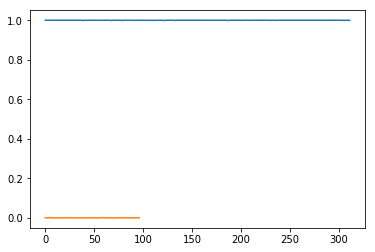

In [5]:
plt.plot(Y_positives)
plt.plot(Y_negatives)
plt.show()

/people/maurice/anaconda3-4.3.1/envs/pyannote-video-dev-newGPU/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


ValueError: too many values to unpack (expected 2)

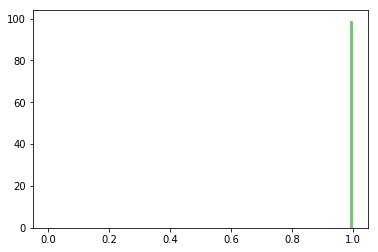

In [19]:
_, bins = plt.hist(Y_positives, bins=np.linspace(0, 1, 100), normed=True, color='g', alpha=0.5)
plt.hist(Y_negatives, bins=bins, normed=True, color='r', alpha=0.5)
plt.show()

In [23]:
print(max(Y_negatives), min(Y_positives))

0.002172622364014387 0.9981908202171326


In [21]:
fpr, tpr, thresholds, eer = binary_classification.det_curve(np.asarray([0 for i in range(len(Y_negatives))] + [1 for i in range(len(Y_positives))]), np.hstack((Y_negatives,Y_positives)))

In [22]:
eer

0.25

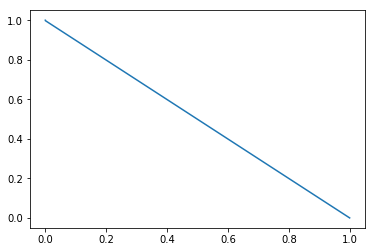

In [30]:
plt.plot(fpr, thresholds)

In [1]:
import data
import model as utils
import pickle
import numpy as np
import torch

In [3]:
device = 'cuda:0'
is_trained = True
type_sentence_embedding='infersent'

X_train, Y_train, X_dev, Y_dev, X_test, Y_test, words_set, we = data.load_data(type_sentence_embedding=type_sentence_embedding)
hidden_size = 300
if type_sentence_embedding == 'lstm':
    taille_embedding = len(we.vectors[we.stoi[X_train[0][0][0]]])
else:
    taille_embedding = 4096

idx_set_words, embed, model_trained, losses = utils.launch_train(X_train, Y_train, words_set, we, taille_embedding, hidden_size=hidden_size, taille_context=3, bidirectional=False, num_layers=1, nb_epoch=300, targset_size=1, device=device, is_trained=is_trained, type_sentence_embedding=type_sentence_embedding)
if is_trained:
    model_trained.load_state_dict(torch.load('/people/maurice/HierarchicalRNN/last_model.pth.tar'))
else:
    np.save('losses.npy', np.asarray(losses))

def get_predictions(X_all, Y_all, idx_set_words, embed, model, taille_context=3, device='cpu', is_eval=False, type_sentence_embedding='lstm'):
    Y_positives_all = []
    Y_negatives_all = []
    file = 0
    for X,Y in zip(X_all,Y_all):
        print('file', file, 'on', len(X_all))
        Y_positives, Y_negatives = utils.get_one_prediction(X, Y, idx_set_words, embed, model, taille_context=taille_context, device=device, is_eval=is_eval,type_sentence_embedding=type_sentence_embedding)
        Y_positives_all += Y_positives
        Y_negatives_all += Y_negatives
        file += 1
        #break
    Y_positives_all = np.asarray(Y_positives_all)
    Y_negatives_all = np.asarray(Y_negatives_all)
    np.save('Y_positives.npy', Y_positives_all)
    np.save('Y_negatives.npy', Y_negatives_all)
    print(np.mean(Y_positives_all), np.mean(Y_negatives_all), np.mean(Y_positives_all) - np.mean(Y_negatives_all))

get_predictions(X_train, Y_train, idx_set_words, embed, model_trained, taille_context=3, device=device, is_eval=True, type_sentence_embedding=type_sentence_embedding)
#get_predictions(X_dev, Y_dev, idx_set_words, embed, model_trained, taille_context=3, device=device, is_eval=True, type_sentence_embedding=type_sentence_embedding)
#get_predictions(X_test, Y_test, idx_set_words, embed, model_trained, taille_context=3, device=device, is_eval=True, type_sentence_embedding=type_sentence_embedding)

file 0 on 176
Found 927(/934) words with w2v vectors
Vocab size : 927


/people/maurice/HierarchicalRNN/model.py:97: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  alpha_ = self.softmax(alpha_)


1.0 1.0 0.0
0.9999996423721313 1.0 3.5762786865234375e-07
0.99997878074646 1.0 2.1219253540039062e-05
0.0009240505169145763 0.0 0.0009240505169145763
2.776459098186024e-07 0.0 2.776459098186024e-07
0.999867014395885 0.00041399021734041415 0.9994530241785445
